#Tittle

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
#plt.style.use('seaborn')

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard

In [15]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.1)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'datasetv2/training',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

val_generator = validation_datagen.flow_from_directory(
    'datasetv2/testing',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

Found 3120 images belonging to 20 classes.
Found 1299 images belonging to 20 classes.


In [16]:
#@title Helper function for plotting Accuracy and Loss
def plot(hist):
  history = hist.history
  history['epoch'] = hist.epoch

  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [17]:
#@title Helper function for testing model
classes = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma',
           'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

def test(model, width):
  test_images_paths = os.listdir('datasetv2/prediction')
  for path in test_images_paths:
    image_path = os.path.join('datasetv2/prediction', path)

    image = keras_image.load_img(image_path,
                                 color_mode='grayscale',
                                 target_size=(width, width))
    x = keras_image.img_to_array(image)
    x = np.expand_dims(x, axis=0)

    test_image = np.vstack([x])
    result = model.predict(test_image, batch_size=8)

    print(image_path)
    print(classes[np.argmax(result)])

    preview = plt_image.imread(image_path)
    plt.imshow(preview)
    plt.show()
  return print('Prediction Done')

In [18]:
base_model = Sequential([Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
                         MaxPool2D(2, 2),
                         Conv2D(32, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(32, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Flatten(),
                         Dropout(0.5),
                         Dense(128, activation='relu'),
                         Dense(20, activation='softmax')])

base_model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

base_model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,980 (1.06 MB)

 Trainable params: 276,980 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
LOGS = 'E:\Pemrograman\Kecerdasan Buatan\Translate Aksara\logs'
NAME = f'baseline_model-{time.time()}'
tensorboard = TensorBoard(log_dir=os.path.join(LOGS, NAME), histogram_freq=1)

%tensorboard --logdir='E:\Pemrograman\Kecerdasan Buatan\Translate Aksara\logs'

Reusing TensorBoard on port 6008 (pid 11024), started 8:39:01 ago. (Use '!kill 11024' to kill it.)

In [20]:
base_hist = base_model.fit(
    train_generator,
    epochs = 100,
    steps_per_epoch = int(1762/32),
    validation_data = val_generator,
    validation_steps= int(979/32),
    callbacks=[tensorboard],
    verbose=1
)

Epoch 1/100


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.0501 - loss: 3.0011 - val_accuracy: 0.0531 - val_loss: 2.9929
Epoch 2/100
43/55 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.0670 - loss: 2.9839

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.0704 - loss: 2.9773 - val_accuracy: 0.2065 - val_loss: 2.7084
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.2353 - loss: 2.5405 - val_accuracy: 0.5729 - val_loss: 1.3141
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.5459 - loss: 1.4953 - val_accuracy: 0.7345 - val_loss: 0.8895
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.6388 - loss: 1.2067 - val_accuracy: 0.7948 - val_loss: 0.6463
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.7004 - loss: 0.9916 - val_accuracy: 0.8319 - val_loss: 0.6171
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.7518 - loss: 0.7340 - val_accuracy: 0.8677 - val_loss: 0.5092
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.7842 - loss: 0.7102 - val_accuracy: 0.7965 - val_loss: 0.6269
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - accuracy: 0.7934 - loss: 0.6761 - val_accuracy: 0.

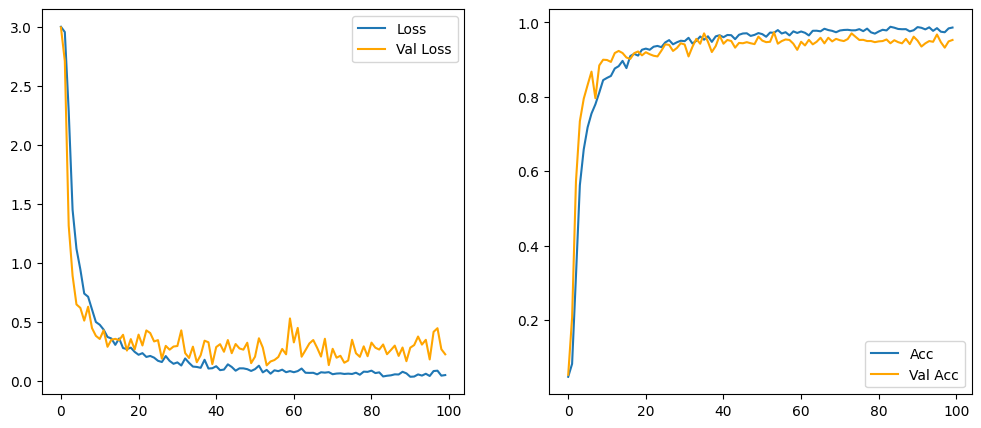

In [21]:
plot(base_hist)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
datasetv2/prediction\ba17.png
ba


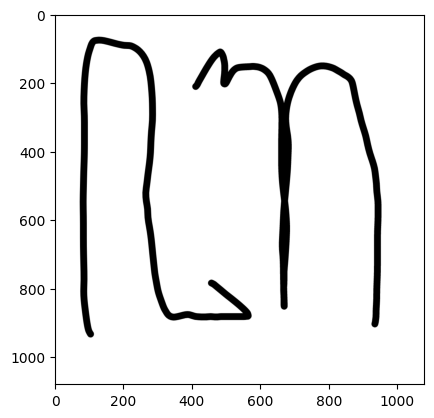

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
datasetv2/prediction\ba49.mine2.png
ba


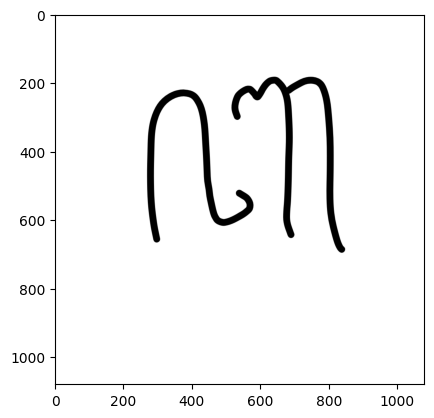

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\ca2.png
ca


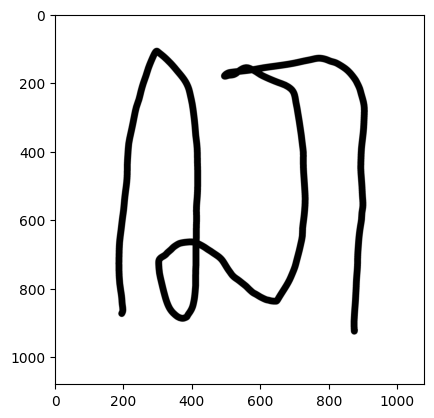

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\da5.png
da


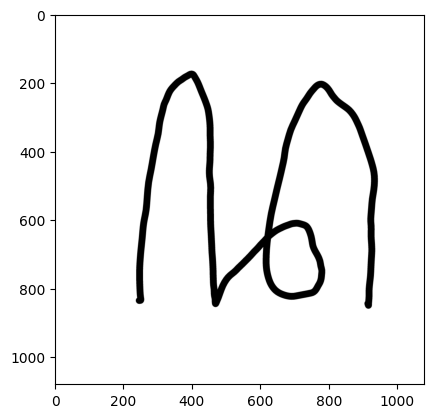

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
datasetv2/prediction\dha11.png
dha


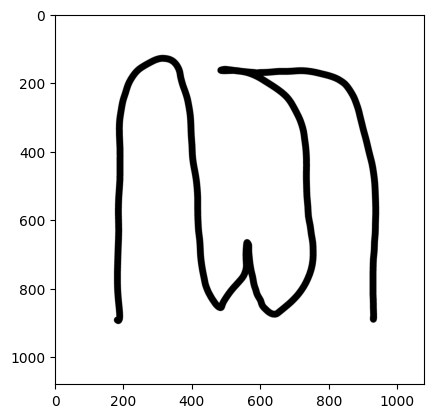

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
datasetv2/prediction\ga16.png
ga


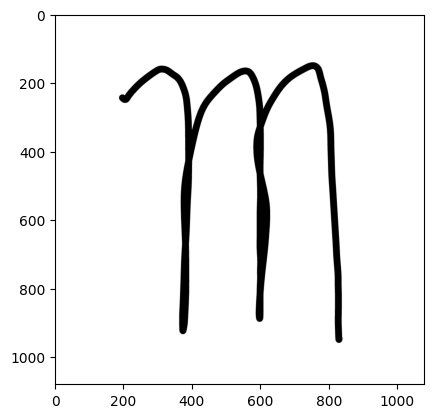

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
datasetv2/prediction\ha0.png
ya


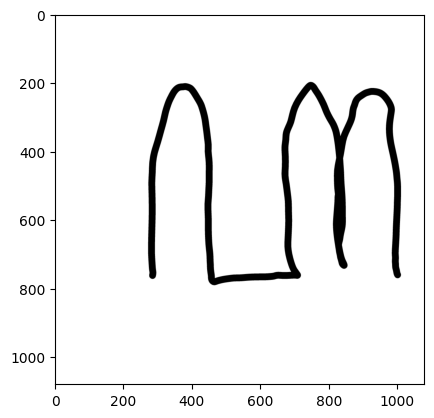

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\ja12.png
ja


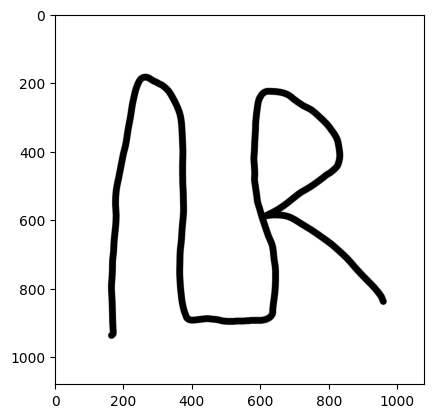

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
datasetv2/prediction\ka4.png
ka


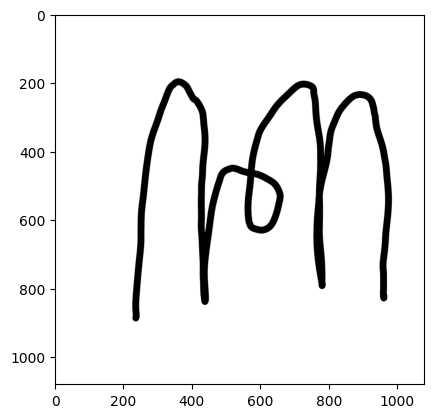

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
datasetv2/prediction\la9.png
la


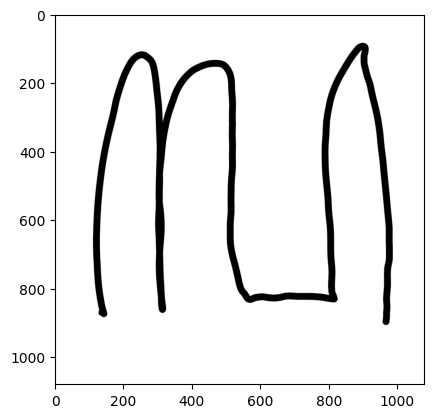

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\ma.0.jpg
ma


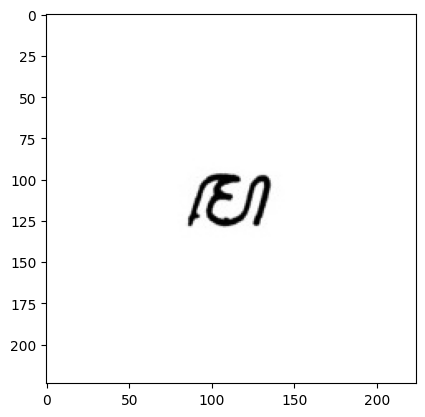

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
datasetv2/prediction\ma.1.jpg
ma


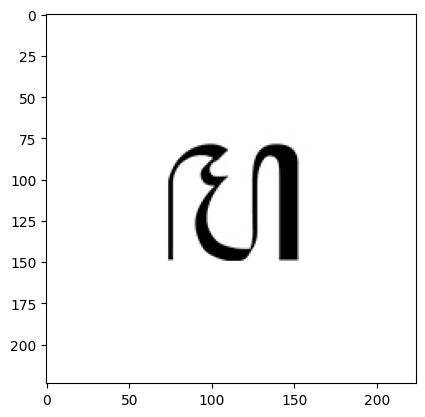

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
datasetv2/prediction\ma15.png
ma


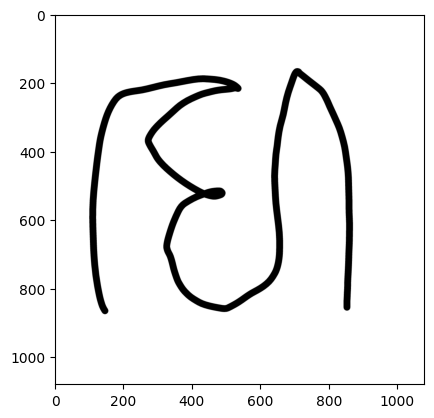

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
datasetv2/prediction\na1.png
na


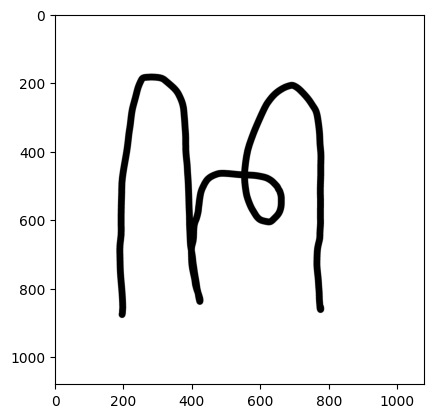

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
datasetv2/prediction\nga19.png
nga


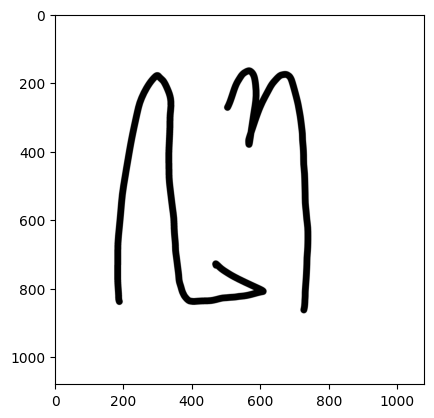

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\nga220.pred.png
nga


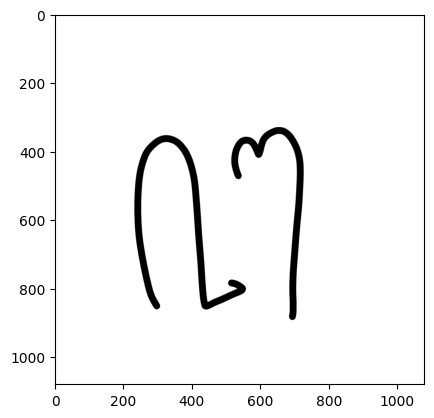

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
datasetv2/prediction\nya14.png
ha


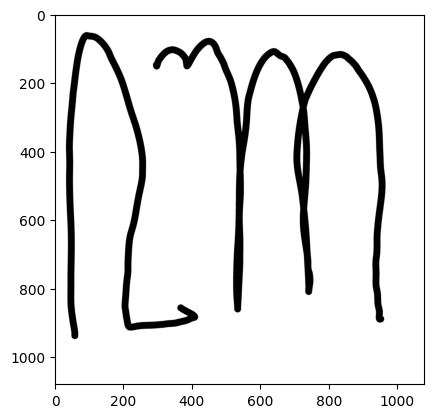

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
datasetv2/prediction\pa10.png
pa


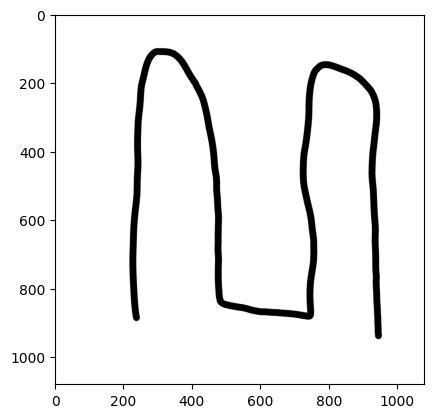

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
datasetv2/prediction\ra164.pred.png
ra


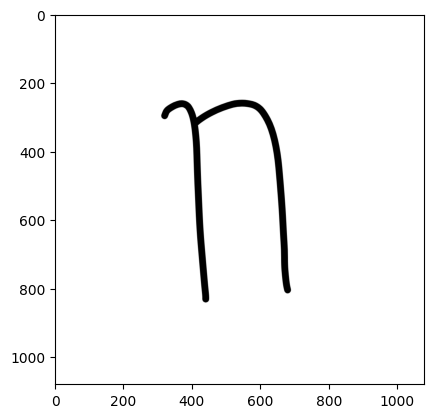

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
datasetv2/prediction\ra3.png
ra


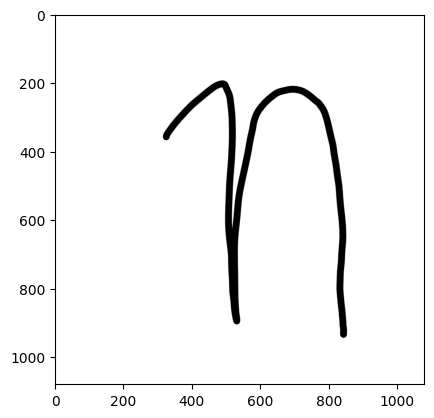

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\sa7.png
sa


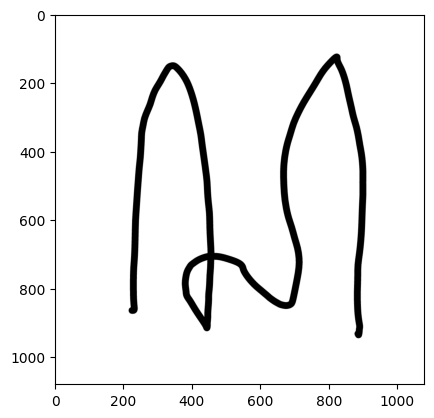

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\ta6.png
ka


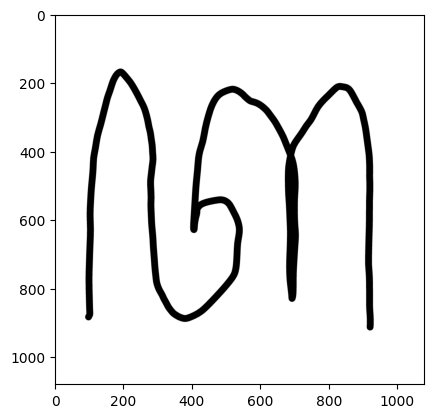

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
datasetv2/prediction\tha18.png
tha


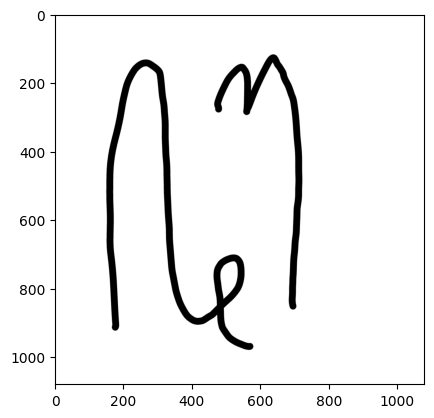

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
datasetv2/prediction\wa8.png
wa


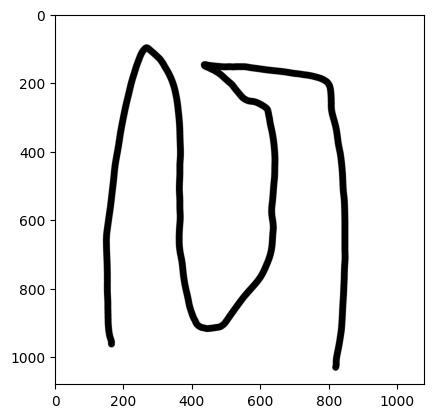

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
datasetv2/prediction\ya13.png
ya


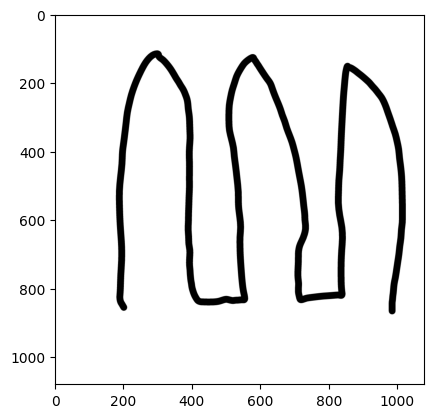

Prediction Done


AssertionError: 

In [22]:
test(base_model, 224)
assert False

In [23]:
!mkdir 'E:\Pemrograman\Kecerdasan Buatan\Translate Aksara'
MODEL_PATH = 'E:\Pemrograman\Kecerdasan Buatan\Translate Aksara'
tf.saved_model.save(base_model, os.path.join(MODEL_PATH, 'saved_model'))

The filename, directory name, or volume label syntax is incorrect.
Error occurred while processing: 'E:\Pemrograman\Kecerdasan.
A subdirectory or file Buatan\Translate already exists.
Error occurred while processing: Buatan\Translate.
A subdirectory or file Aksara' already exists.
Error occurred while processing: Aksara'.


INFO:tensorflow:Assets written to: E:\Pemrograman\Kecerdasan Buatan\Translate Aksara\saved_model\assets


INFO:tensorflow:Assets written to: E:\Pemrograman\Kecerdasan Buatan\Translate Aksara\saved_model\assets


In [24]:
tf.keras.models.save_model(base_model, os.path.join(MODEL_PATH, 'base_model.h5'))